<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Social_Economic_Impact_Practice_2_md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)

In [2]:
n = 500
districts = ["Downtown", "Suburban", "Industrial Zone", "Residential Area"]
trust_levels = ["High", "Medium", "Low"]

data_traffic = pd.DataFrame({
    "Sensor_ID": range(1, n + 1),
    "District": np.random.choice(districts, n, p=[0.35, 0.3, 0.2, 0.15]),
    "Vehicle_Count": np.random.randint(50, 1000, n),         # vehicles per hour
    "Average_Speed": np.round(np.random.uniform(10, 70, n), 1), # km/h
    "Accident_Alert": np.random.choice([0, 1], n, p=[0.9, 0.1]),
    "Public_Trust_in_AI": np.random.choice(trust_levels, n, p=[0.4, 0.4, 0.2])
})

bins = [0, 200, 500, 800, 1000]
labels = ["Low", "Moderate", "High", "Severe"]
data_traffic["Congestion_Level"] = pd.cut(data_traffic["Vehicle_Count"], bins=bins, labels=labels, include_lowest=True)

print("Sample rows:\n", data_traffic.head(), "\n")


Sample rows:
    Sensor_ID          District  Vehicle_Count  Average_Speed  Accident_Alert  \
0          1          Suburban            551           30.5               0   
1          2  Residential Area            194           59.3               0   
2          3   Industrial Zone            250           16.6               0   
3          4          Suburban            978           60.8               0   
4          5          Downtown            773           17.6               0   

  Public_Trust_in_AI Congestion_Level  
0               High             High  
1               High              Low  
2             Medium         Moderate  
3             Medium           Severe  
4                Low             High   



=== Part 1: Traffic Patterns ===

District summary (sorted by avg vehicle count):
                   sensors  avg_vehicle_count  median_speed  accident_count  \
District                                                                     
Downtown              179             538.58          43.9              17   
Suburban              148             533.97          39.8              12   
Residential Area       83             525.52          38.8               7   
Industrial Zone        90             480.40          37.3              12   

                  accident_rate  
District                         
Downtown                   0.09  
Suburban                   0.08  
Residential Area           0.08  
Industrial Zone            0.13  


/tmp/ipython-input-1337097222.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg["avg_vehicle_count"], palette="viridis")


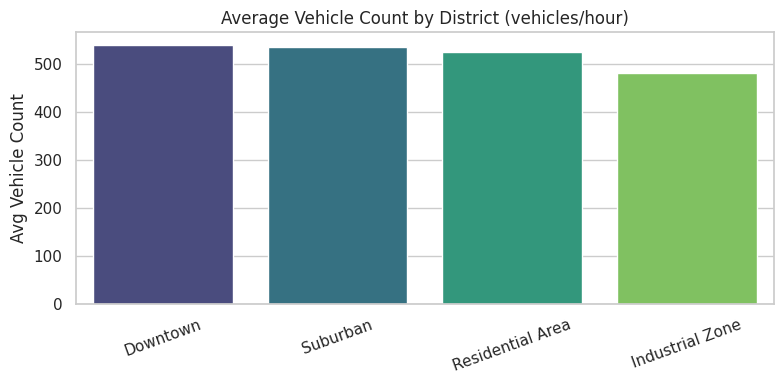

/tmp/ipython-input-1337097222.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg["median_speed"], palette="magma")


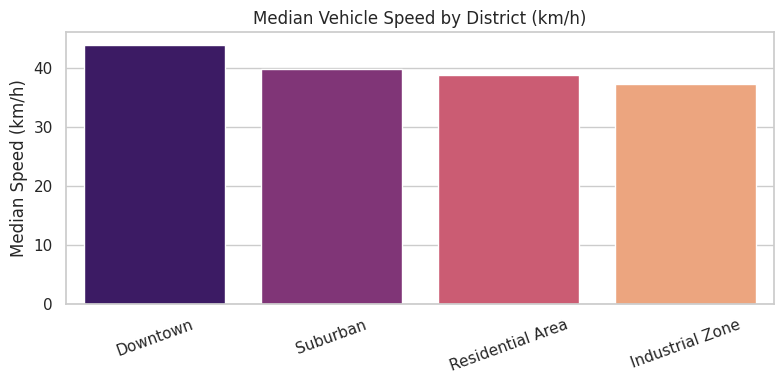

/tmp/ipython-input-1337097222.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg["accident_rate"], palette="rocket")


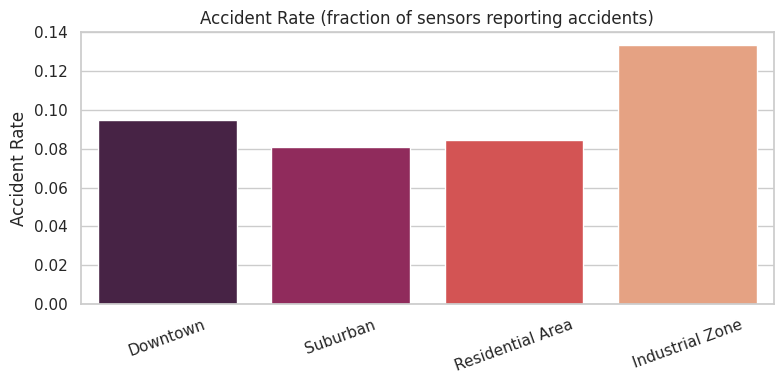

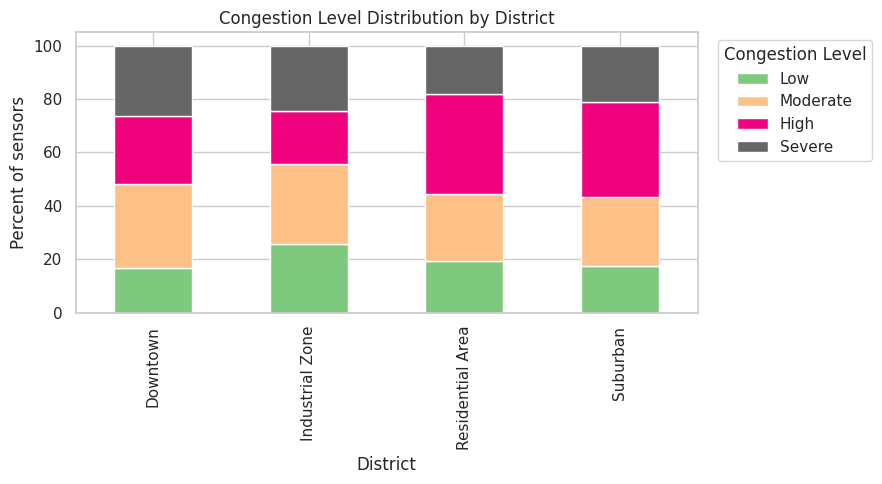

In [3]:
print("=== Part 1: Traffic Patterns ===")

# Summary stats by District
agg = data_traffic.groupby("District").agg(
    sensors=("Sensor_ID","count"),
    avg_vehicle_count=("Vehicle_Count","mean"),
    median_speed=("Average_Speed","median"),
    accident_count=("Accident_Alert","sum"),
    accident_rate=("Accident_Alert","mean")
).sort_values("avg_vehicle_count", ascending=False)

print("\nDistrict summary (sorted by avg vehicle count):\n", agg.round(2))

# Plot: Avg vehicle count by district
plt.figure(figsize=(8,4))
sns.barplot(x=agg.index, y=agg["avg_vehicle_count"], palette="viridis")
plt.title("Average Vehicle Count by District (vehicles/hour)")
plt.ylabel("Avg Vehicle Count")
plt.xlabel("")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("avg_vehicle_count_by_district.png", dpi=120)
plt.show()

# Plot: Median speed by district
plt.figure(figsize=(8,4))
sns.barplot(x=agg.index, y=agg["median_speed"], palette="magma")
plt.title("Median Vehicle Speed by District (km/h)")
plt.ylabel("Median Speed (km/h)")
plt.xlabel("")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("median_speed_by_district.png", dpi=120)
plt.show()

# Plot: Accident rate by district
plt.figure(figsize=(8,4))
sns.barplot(x=agg.index, y=agg["accident_rate"], palette="rocket")
plt.title("Accident Rate (fraction of sensors reporting accidents)")
plt.ylabel("Accident Rate")
plt.xlabel("")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("accident_rate_by_district.png", dpi=120)
plt.show()

# Congestion distribution stacked
cong = pd.crosstab(data_traffic["District"], data_traffic["Congestion_Level"], normalize='index') * 100
cong = cong[labels]  # ensure order
cong.plot(kind="bar", stacked=True, figsize=(9,5), colormap="Accent")
plt.ylabel("Percent of sensors")
plt.title("Congestion Level Distribution by District")
plt.legend(title="Congestion Level", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig("congestion_distribution_by_district.png", dpi=120)
plt.show()


In [4]:
hotspots = data_traffic[(data_traffic["Vehicle_Count"] > 800) | (data_traffic["Accident_Alert"]==1)]
hotspot_counts = hotspots["District"].value_counts()
print("\nHotspot counts by District (Vehicle_Count>800 or Accident):\n", hotspot_counts)



Hotspot counts by District (Vehicle_Count>800 or Accident):
 District
Downtown            59
Suburban            42
Industrial Zone     30
Residential Area    21
Name: count, dtype: int64


In [5]:
print("\n=== Part 2: Ethical Risks & Fairness Checks ===")

# Simple fairness check: Are certain districts under-monitored (few sensors) vs high need?
sensors_per_100k = (agg["sensors"] / agg["sensors"].sum())  # proxy fraction of sensors
need_score = (agg["avg_vehicle_count"] / agg["avg_vehicle_count"].max()) + (agg["accident_rate"] / agg["accident_rate"].max())
need_score = need_score / need_score.max()
fairness_df = pd.DataFrame({
    "sensors_fraction": sensors_per_100k,
    "normalized_need": need_score
})
fairness_df["sensors_vs_need_gap"] = fairness_df["sensors_fraction"] - fairness_df["normalized_need"]
print("\nSensors vs Need (positive = more sensors than need, negative = under-monitored):\n", fairness_df.round(3))

print("\nEthical concerns:")
print("- Privacy: vehicle tracking and license-plate level linking can enable surveillance; minimize PII retention.")
print("- Bias / fairness: districts with negative sensors_vs_need_gap may receive less attention despite higher need.")
print("- Accountability: automated rerouting or priority changes must be auditable and reviewable by humans.")

# Suggested technical mitigations
print("\nSuggested technical mitigations:")
print("1) Aggregate/ anonymize vehicle counts at source; avoid storing identifiable traces.")
print("2) Ensure sensor deployment strategy prioritizes 'need' (combine congestion + accident_rate) not just population or revenue.")
print("3) Run routine fairness audits (sensors vs need gap) and publish results.")



=== Part 2: Ethical Risks & Fairness Checks ===

Sensors vs Need (positive = more sensors than need, negative = under-monitored):
                   sensors_fraction  normalized_need  sensors_vs_need_gap
District                                                                
Downtown                     0.358            0.905               -0.547
Suburban                     0.296            0.845               -0.549
Residential Area             0.166            0.850               -0.684
Industrial Zone              0.180            1.000               -0.820

Ethical concerns:
- Privacy: vehicle tracking and license-plate level linking can enable surveillance; minimize PII retention.
- Bias / fairness: districts with negative sensors_vs_need_gap may receive less attention despite higher need.
- Accountability: automated rerouting or priority changes must be auditable and reviewable by humans.

Suggested technical mitigations:
1) Aggregate/ anonymize vehicle counts at source; avoid


=== Part 3: Public Trust ===

Public trust distribution (%):
 Public_Trust_in_AI
Medium    43.0
High      36.8
Low       20.2
Name: proportion, dtype: float64


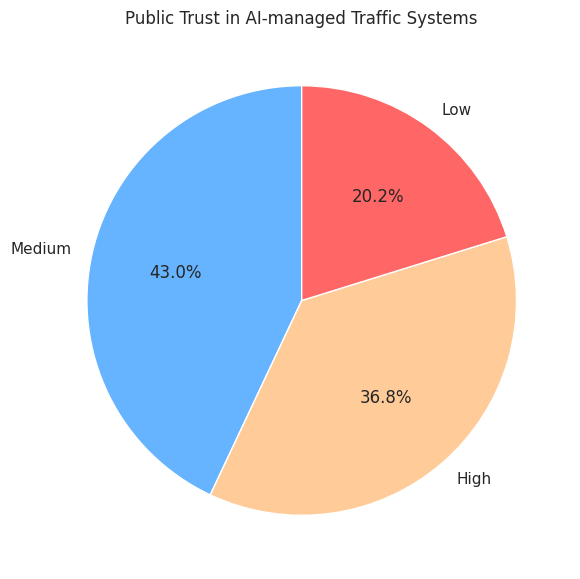


Ways to build trust:
- Transparent dashboards showing decisions (why lights changed / why reroute).
- Explainable alerts and local context (show safety rationale for interventions).
- Human oversight on high-impact actions (accident response, large re-routing).
- Open data & community engagement: publish aggregated traffic metrics and involve local reps in policy.


In [6]:
print("\n=== Part 3: Public Trust ===")
trust_counts = data_traffic["Public_Trust_in_AI"].value_counts(normalize=True) * 100
print("\nPublic trust distribution (%):\n", trust_counts.round(1))

plt.figure(figsize=(6,6))
plt.pie(trust_counts, labels=trust_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#66b3ff','#ffcc99','#ff6666'])
plt.title("Public Trust in AI-managed Traffic Systems")
plt.tight_layout()
plt.savefig("public_trust_pie.png", dpi=120)
plt.show()

print("\nWays to build trust:")
print("- Transparent dashboards showing decisions (why lights changed / why reroute).")
print("- Explainable alerts and local context (show safety rationale for interventions).")
print("- Human oversight on high-impact actions (accident response, large re-routing).")
print("- Open data & community engagement: publish aggregated traffic metrics and involve local reps in policy.")

In [7]:
print("\n=== Final Recommendations ===")
print("""
Technical:
- Prioritize sensor placement using a 'need' score (congestion + accident_rate) and re-balance deployments.
- Use privacy-by-design: aggregate data, short retention, and differential privacy for public releases.
- Implement explainable models for signal timing; log decisions and store audit trails.

Operational / Governance:
- Create an independent oversight committee including community reps to review system behavior.
- Publish regular fairness & performance audits (sensors_vs_need_gap, accident mitigation outcomes).
- Maintain incident reporting & human-in-the-loop escalation for controversial or high-impact automated actions.

Community & Trust:
- Public dashboards, alert explanations, and community consultation before major changes.
- Educational outreach about how AI helps safety and what safeguards are in place.
""")

# Save a concise CSV summary for auditors
summary = agg.reset_index().rename(columns={"index":"District"})
summary.to_csv("district_traffic_summary.csv", index=False)
print("Saved: district_traffic_summary.csv and multiple PNG visualizations.")


=== Final Recommendations ===

Technical:
- Prioritize sensor placement using a 'need' score (congestion + accident_rate) and re-balance deployments.
- Use privacy-by-design: aggregate data, short retention, and differential privacy for public releases.
- Implement explainable models for signal timing; log decisions and store audit trails.

Operational / Governance:
- Create an independent oversight committee including community reps to review system behavior.
- Publish regular fairness & performance audits (sensors_vs_need_gap, accident mitigation outcomes).
- Maintain incident reporting & human-in-the-loop escalation for controversial or high-impact automated actions.

Community & Trust:
- Public dashboards, alert explanations, and community consultation before major changes.
- Educational outreach about how AI helps safety and what safeguards are in place.

Saved: district_traffic_summary.csv and multiple PNG visualizations.
